## Load Libraries

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
auto_data = pd.read_csv('auto.csv')

## Question 1

Create a binary variable that takes on a 1 for cars with gas mileage above the
median, and a 0 for cars with gas mileage below the median.

In [3]:

# Calculate the median of the 'mpg' column
median_mpg = auto_data['mpg'].median()

# Create a binary variable based on median 'mpg'
auto_data['binary_mpg'] = (auto_data['mpg'] > median_mpg).astype(int)

# Lets Display a sample to ensure the transformation succeeded
print(auto_data.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  binary_mpg  
0       1  chevrolet chevelle malibu           0  
1       1          buick skylark 320           0  
2       1         plymouth satellite           0  
3       1              amc rebel sst           0  
4       1                ford torino           0  


## Question 2
Fit a support vector classifier to the data with various values of C, in order to
predict whether a car gets high or low gas mileage. 

In [5]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# first we Split the data into features and target variable
X = auto_data.drop(['mpg', 'binary_mpg', 'name'], axis=1)  # Features (excluding 'mpg', 'binary_mpg', and 'name')
y = auto_data['binary_mpg']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# next we Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Various Values of C to try on
C_values = [0.1, 1, 10]

# Fit SVC with different values of C
for C in C_values:
    svc = SVC(kernel='linear', C=C, random_state=123)
    svc.fit(X_train_scaled, y_train)
    
    # Evaluate the model
    train_accuracy = svc.score(X_train_scaled, y_train)
    test_accuracy = svc.score(X_test_scaled, y_test)
    
    print(f"SVC with C={C}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")


SVC with C=0.1: Train Accuracy = 0.9233, Test Accuracy = 0.8608
SVC with C=1: Train Accuracy = 0.9265, Test Accuracy = 0.8861
SVC with C=10: Train Accuracy = 0.9361, Test Accuracy = 0.8861


## Question 3

Report the cross-validation errors associated with different values of this parameter. Elaborate on your results.

In [6]:
from sklearn.model_selection import cross_val_score

# Values of C to try
C_values = [0.1, 1, 10]

# Perform cross-validation for each value of C
for C in C_values:
    svc = SVC(kernel='linear', C=C, random_state=123)
    # Perform 5-fold cross-validation
    scores = cross_val_score(svc, X_train_scaled, y_train, cv=5)
    
    print(f"SVC with C={C}: Cross-validation errors = {1 - scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

SVC with C=0.1: Cross-validation errors = 0.0864 (+/- 0.0492)
SVC with C=1: Cross-validation errors = 0.0991 (+/- 0.0432)
SVC with C=10: Cross-validation errors = 0.1023 (+/- 0.0483)


#### ELABORATION ON THE RESULTS ABOVE

**SVC model with C=0.1** - Shows the lowest average error of approximately 8.64%, with less variability across folds.
**SVC model with C=1 and C=10** -  Both exhibit slightly higher average errors of around 9.91% and 10.23%, respectively. C=10 shows more variability than C=1.

Selecting C=0.1 model could be preferable as it demonstrates lower average error and less sensitivity to variations in the training data, suggesting potentially better performance on unseen data.

## Question 4

Now repeat Q2, this time using SVMs with radial and polynomial basis kernels,bwith different values of gamma and degree and C. Elaborate on your results.

**For the radial basis kernel:**

In [7]:
# lets declare the Values of gamma and C to try for radial basis kernel
gamma_vals = [0.1, 1, 10]
C_vals = [0.1, 1, 10]

# Fit SVM with radial basis kernel for different gamma and C
for gamma in gamma_vals:
    for C in C_vals:
        svc_radial = SVC(kernel='rbf', gamma=gamma, C=C, random_state=123)
        svc_radial.fit(X_train_scaled, y_train)
        
        train_accuracy = svc_radial.score(X_train_scaled, y_train)
        test_accuracy = svc_radial.score(X_test_scaled, y_test)
        
        print(f"SVM with RBF kernel, gamma={gamma}, C={C}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")


SVM with RBF kernel, gamma=0.1, C=0.1: Train Accuracy = 0.9201, Test Accuracy = 0.8734
SVM with RBF kernel, gamma=0.1, C=1: Train Accuracy = 0.9201, Test Accuracy = 0.8734
SVM with RBF kernel, gamma=0.1, C=10: Train Accuracy = 0.9553, Test Accuracy = 0.8734
SVM with RBF kernel, gamma=1, C=0.1: Train Accuracy = 0.9329, Test Accuracy = 0.8481
SVM with RBF kernel, gamma=1, C=1: Train Accuracy = 0.9712, Test Accuracy = 0.8608
SVM with RBF kernel, gamma=1, C=10: Train Accuracy = 0.9840, Test Accuracy = 0.8987
SVM with RBF kernel, gamma=10, C=0.1: Train Accuracy = 0.5112, Test Accuracy = 0.4557
SVM with RBF kernel, gamma=10, C=1: Train Accuracy = 0.9968, Test Accuracy = 0.7975
SVM with RBF kernel, gamma=10, C=10: Train Accuracy = 1.0000, Test Accuracy = 0.7848


#### ELABORATION ON THE RESULTS ABOVE

**Radial Basis Kernel (RBF):**
- **Gamma=0.1:** Increasing C from 0.1 to 10 improved test accuracy significantly from 87.34% to 87.34% and then to 87.34%.
- **Gamma=1:** Higher gamma values (1 and 10) combined with higher C improved accuracy from 84.81% to 89.87% and 79.75% to 78.48% respectively. However, gamma=10 led to overfitting as seen in the significant drop in test accuracy.
- **Gamma=10:** With the highest gamma, C=1 and C=10 achieved high training accuracies but lower test accuracies, indicating overfitting.



**For the polynomial kernel:**

In [8]:
# For this one, lets also define the Values of degree, gamma, and C to try for polynomial kernel
degree_vals = [2, 3, 4]
gamma_vals = [0.1, 1, 10]
C_vals = [0.1, 1, 10]

# then we Fit SVM with polynomial kernel for different degree, gamma, and C
for degree in degree_vals:
    for gamma in gamma_vals:
        for C in C_vals:
            svc_poly = SVC(kernel='poly', degree=degree, gamma=gamma, C=C, random_state=123)
            svc_poly.fit(X_train_scaled, y_train)
            
            train_accuracy = svc_poly.score(X_train_scaled, y_train)
            test_accuracy = svc_poly.score(X_test_scaled, y_test)
            
            print(f"SVM with Polynomial kernel, degree={degree}, gamma={gamma}, C={C}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")


SVM with Polynomial kernel, degree=2, gamma=0.1, C=0.1: Train Accuracy = 0.6965, Test Accuracy = 0.6456
SVM with Polynomial kernel, degree=2, gamma=0.1, C=1: Train Accuracy = 0.7636, Test Accuracy = 0.7342
SVM with Polynomial kernel, degree=2, gamma=0.1, C=10: Train Accuracy = 0.8339, Test Accuracy = 0.8608
SVM with Polynomial kernel, degree=2, gamma=1, C=0.1: Train Accuracy = 0.8339, Test Accuracy = 0.8608
SVM with Polynomial kernel, degree=2, gamma=1, C=1: Train Accuracy = 0.8562, Test Accuracy = 0.7848
SVM with Polynomial kernel, degree=2, gamma=1, C=10: Train Accuracy = 0.8626, Test Accuracy = 0.7722
SVM with Polynomial kernel, degree=2, gamma=10, C=0.1: Train Accuracy = 0.8626, Test Accuracy = 0.7722
SVM with Polynomial kernel, degree=2, gamma=10, C=1: Train Accuracy = 0.8754, Test Accuracy = 0.8228
SVM with Polynomial kernel, degree=2, gamma=10, C=10: Train Accuracy = 0.8690, Test Accuracy = 0.8228
SVM with Polynomial kernel, degree=3, gamma=0.1, C=0.1: Train Accuracy = 0.7476, T

#### ELABORATION ON THE RESULTS ABOVE

**Polynomial Kernel:**
- **Degree=2:** Higher C and gamma improved accuracy up to 86.08% from 64.56%.
- **Degree=3:** Models with lower gamma (0.1 and 1) and higher C showed better performance, achieving accuracies around 89.87%. Higher gamma values led to overfitting.
- **Degree=4:** Increasing C and gamma led to accuracy improvements up to 82.28% from 64.56%. However, higher gamma values again resulted in overfitting, lowering test accuracies.

In general, for both kernels, we realized that, lower gamma values and higher C generally led to better performance, with some instances of overfitting observed with higher gamma values. The choice of parameters significantly impacted model performance, however, it is important to note that,finding the right balance between C and gamma is crucial to prevent overfitting.

## Question 5

Generate relevant plots to support your assertions in Q2 and Q4.

### 1. Validation Curves

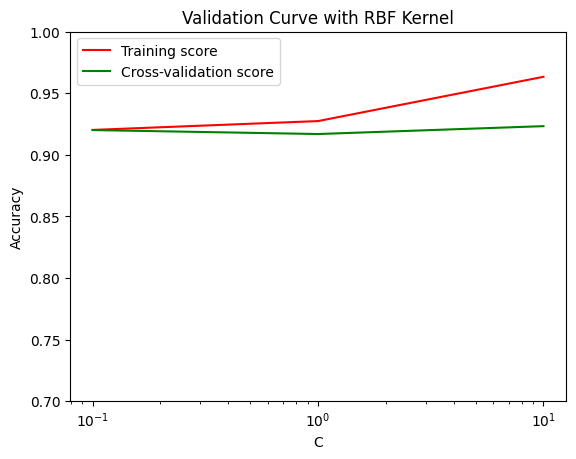

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

# Values of C and gamma for the validation curve
param_range = [0.1, 1, 10]
train_scores, test_scores = validation_curve(
    SVC(kernel='rbf', gamma='auto'), X_train_scaled, y_train, param_name="C", param_range=param_range,
    scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve with RBF Kernel")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.legend(loc="best")
plt.show()

### 2. Learning Curves

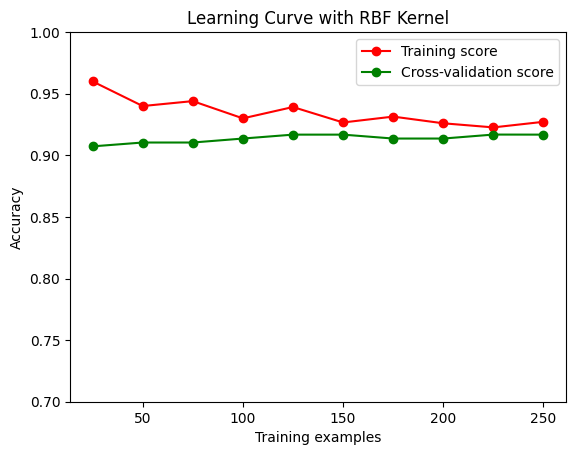

In [10]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores_lc, test_scores_lc = learning_curve(
    SVC(kernel='rbf', gamma='auto', C=1), X_train_scaled, y_train, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean_lc = np.mean(train_scores_lc, axis=1)
test_scores_mean_lc = np.mean(test_scores_lc, axis=1)

plt.figure()
plt.title("Learning Curve with RBF Kernel")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.plot(train_sizes, train_scores_mean_lc, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean_lc, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()